In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 图形出现在Notebook里面而不是窗口
%matplotlib inline

### 一、对连续型特征，可以用哪个函数可视化其分布？（给出你最常用的一个即可），并根据代码运行结果给出示例。

Text(0.5, 0, 'Median value of owner-occupied homes')

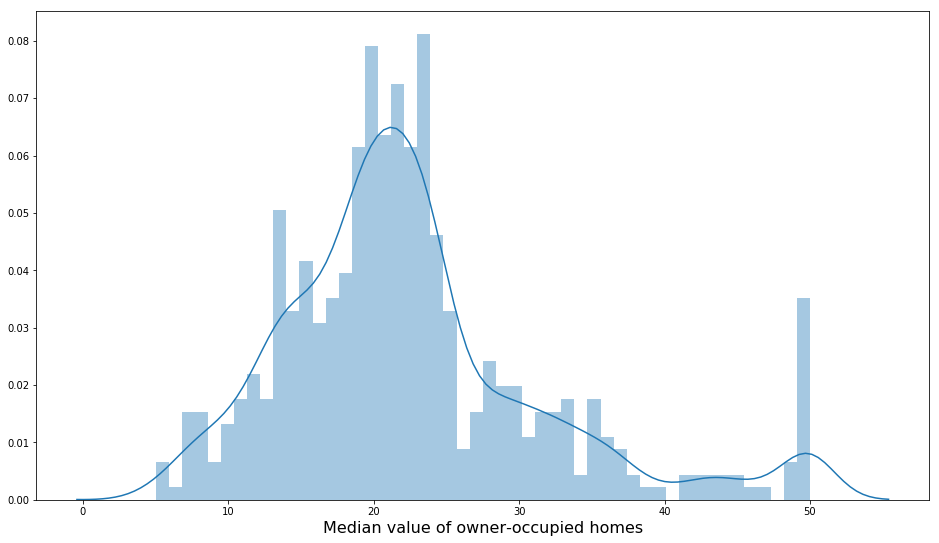

In [14]:
#df = pd.read_csv("boston_housing.csv")
hw4_df = pd.read_csv("E:\\my work\\Boston House Price\\boston_housing.csv")

fig = plt.figure(figsize=(16, 9))
sns.distplot(hw4_df['MEDV'], bins=50, kde=True)
plt.xlabel("Median value of owner-occupied homes", fontsize=16)

由上图可知,可采用seaborn库里面的distplot函数可视化其分布，即直方图，用于对数值型特征进行可视化展示，可直观看出某变量是否符合正态分布的特征

- 小提琴图（violinplot）也可用于一个或多个分类变量情况下，连续变量数据的分布并进行了比较，Violinplot还可以用于观察多个数据分布

### 二、对两个连续型特征，可以用哪个函数得到这两个特征之间的相关性？根据代码运行结果，给出示例。

采用pandas.DataFrame.corr()求数据表中两两特征之间的协方差系数矩阵，然后通过seaborn.heatmap()，绘制出热力图
- heatmap()中的mask参数，是反向的，即为True不显示，用起来有点别扭

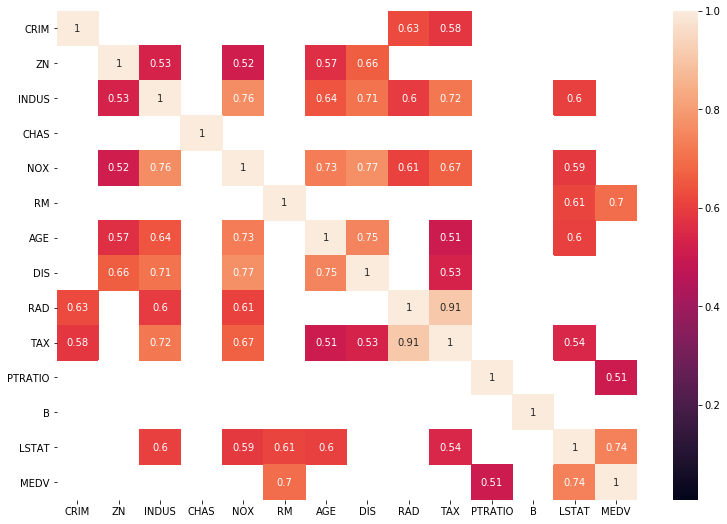

In [15]:
data_corr = hw4_df.corr()
# 得到相关系数的绝对值
data_corr = data_corr.abs()

plt.subplots(figsize=(13, 9))
#通常认为相关系数的绝对值大于0.5的特征为强相关
# Mask unimportant features,突出重要信息
#sns.heatmap(data_corr,annot=True)
sns.heatmap(data_corr, mask=data_corr<0.5, cbar=True, annot=True)

#plt.savefig("house_coor.png" )
plt.show()

### 三、如果发现特征之间有较强的相关性，在选择线性回归模型时应采取什么措施？

如果特征之间高度相关，可考虑进行PCA降维（特征层面）或加正则项（模型层面）

### 四、当采用代正则项的模型以及采用随机梯度下降优化算法时，需要对输入（连续型）特征进行去量纲预处理。课程代码给出了用标准化（StandardScaler）的结果，请改成最小最大缩放（MinMaxScaler）去量纲，并重新训练最小二乘线性回归、岭回归和Lasso模型。

In [16]:
from sklearn.preprocessing import MinMaxScaler

# 从hw4_df数据集中分离出特征X和输出y
y = hw4_df['MEDV']
X = hw4_df.drop('MEDV', axis=1)
# 特征名称，用于后续显示权重系数对应的特征
feat_names = X.columns
# 对特征和输出进行初始化声明
mms_y = MinMaxScaler()
mms_X = MinMaxScaler()

# 分别对训练和测试数据的特征以及目标值进行最小最大缩放处理
# 对训练数据，先调用fit方法训练模型，得到模型参数,然后对训练数据和测试数据进行transform
# sklearn支持fit_transform()将两个步骤合二为一
y = mms_y.fit_transform(y.values.reshape(-1, 1)) #Series→DataFrame→fit_transform()→numpy.ndarray
X = mms_X.fit_transform(X)

D:\Develop Kit\Anaconda3_2019\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
# 保存特征工程的结果到文件，供机器学习模型使用
fe_hw4_data = pd.DataFrame(data = X, columns = feat_names, index = hw4_df.index)
fe_hw4_data['MEDV'] = y

#fe_data.to_csv('FE_boston_housing_第四周基础作业.csv', index=False)
fe_hw4_data.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX  PTRATIO         B     LSTAT      MEDV  
0  0.000000  0.208015      0.3  1.000000  0.089680  0.422222  
1  0.043478  0.104962      0.5  1.000000  0.204470  0.368889  
2  0.043478  0.104962      0.5  0.989737  0.063466  0.660000  
3  0.086957  0.066794      0.6  0.994276  0.033389  0.631111  
4  0.086957  0.066794      0.6  1.000000  0.099338  0.693333

In [18]:
# 将数据分割训练数据和测试数据
from sklearn.model_selection import train_test_split
# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)

#### OLS

In [19]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# 1.初始化
lr = LinearRegression()
# 2. 求得训练集X的均值，方差，最大值，最小值,这些训练集X固有的属性。
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

#训练集
print("训练集(train)在线性回归模型的得分为%.6f" %r2_score(y_train, y_train_pred_lr))
#测试集
print("测试集(test)在线性回归模型的得分为%.6f" %r2_score(y_test, y_test_pred_lr))

训练集(train)在线性回归模型的得分为0.745145
测试集(test)在线性回归模型的得分为0.690296


#### 岭回归 (L2正则)

In [20]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import RidgeCV

hyper_param = [0.1, 1, 10, 100]
#n_alphas = 20
#alphas = np.logspace(-5,2,n_alphas)

ridge = RidgeCV(alphas=hyper_param, store_cv_values=True)

ridge.fit(X_train, y_train)

y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

print("训练集(train)在岭回归模型的得分为%f" %r2_score(y_train, y_train_pred_ridge))
print("测试集(test)在岭回归模型的得分为%f" %r2_score(y_test, y_test_pred_ridge))

训练集(train)在岭回归模型的得分为0.745081
测试集(test)在岭回归模型的得分为0.692915


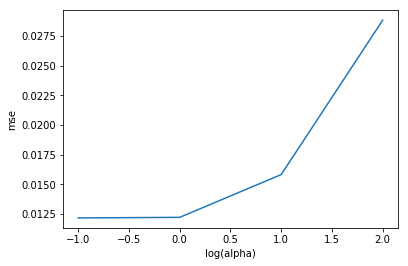

alpha is: 0.1


In [21]:
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(hyper_param), mse_mean.reshape(len(hyper_param),1)) 

#这是为了标出最佳参数的位置，不是必须
#plt.plot(np.log10(ridge.alpha_)*np.ones(3), [0.28, 0.29, 0.30])

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', ridge.alpha_)

#### Lasso(L1正则)

In [22]:
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV
hyper_param = [0.01, 0.1, 1, 10, 100]
#n_alphas = 20
#alphas = np.logspace(-5,2,n_alphas)
lasso = LassoCV(alphas=hyper_param)
lasso.fit(X_train, y_train)
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)
print("训练集(train)在Lasso模型的得分为%f" %r2_score(y_train, y_train_pred_lasso))
print("测试集(test)在Lasso模型的得分为%f" %r2_score(y_test, y_test_pred_lasso))

训练集(train)在Lasso模型的得分为0.544046
测试集(test)在Lasso模型的得分为0.598498


D:\Develop Kit\Anaconda3_2019\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Develop Kit\Anaconda3_2019\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


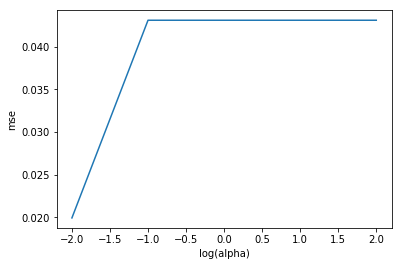

alpha is: 0.01


In [23]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)

### 五、代码中给出了岭回归（RidgeCV）和Lasso（LassoCV）超参数（alpha_）调优的过程，请结合两个最佳模型以及最小二乘线性回归模型的结果，给出什么场合应该用岭回归，什么场合用Lasso，什么场合用最小二乘。

最小二乘：根据最小二次的线性回归的求解公式，可知当输入特征存在共线性时，权重矩阵求拟不稳定，导致结果不会很理想，所以最小二次法适用与特征之间相关性不强的数据。而且由于最小二乘与其他两个模型相比未加正则项，只考虑了对训练样本的拟合程度，故在训练集上的结果最好，但容易产生过拟合

岭回归：岭回归由于加入了L2正则项，通过alpha参数的调节，可以平衡拟合程度和模型复杂度之间的关系，使得线性回归系数收缩，模型稳定，当输入特征之间存在共线性时使用较好

Lasso回归：Lasso也会收缩回归系数，且输入特征之间存在强共线性时，可以使用